In [3]:
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LR
from sklearn.datasets import load_boston
from sklearn.model_selection import  KFold,cross_val_score as CVS,train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data =load_boston()

In [6]:
X =data.data
y =data.target

In [7]:
X.shape

(506, 13)

In [75]:
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=0)

In [76]:
reg = XGBR(n_estimators=100).fit(Xtrain,Ytrain)
reg.predict(Xtest)

array([23.514858 , 25.357508 , 23.967194 ,  8.312714 , 21.130411 ,
       21.105719 , 20.725838 , 19.562037 , 18.492672 , 18.792444 ,
        5.245555 , 14.614181 , 14.519265 ,  8.962308 , 49.295475 ,
       35.596317 , 20.7442   , 36.336857 , 27.304792 , 22.107613 ,
       23.722286 , 22.575104 , 20.196106 , 24.18872  , 20.026031 ,
       18.116072 , 17.950891 , 17.61209  , 46.694416 , 17.947472 ,
       17.039284 , 16.824755 , 19.347277 , 19.862356 , 26.527122 ,
       18.40976  ,  8.042847 , 26.1059   , 14.421124 , 15.414048 ,
       23.519497 , 21.439966 , 23.397078 , 14.55915  , 21.181278 ,
       22.45081  , 20.791506 , 17.89683  , 15.855738 , 23.79707  ,
       17.793732 , 20.995626 , 20.236633 , 37.784916 , 15.410646 ,
       19.505308 , 17.211187 , 17.786005 , 17.191828 , 20.571682 ,
       21.583426 , 20.924376 , 31.629545 , 28.701424 , 19.519058 ,
       27.415407 , 17.743    , 18.192339 , 13.872983 , 24.24774  ,
       20.135036 , 22.032103 , 23.491331 , 32.408066 , 24.9377

In [77]:
reg.score(Xtest,Ytest)

0.7876616472404768

In [78]:
MSE(Ytest,reg.predict(Xtest))

17.680459460938792

In [79]:
reg.feature_importances_#XGBoost 可以通过嵌入法（SelectFromModel）选择特征

array([0.02148241, 0.00128354, 0.01179022, 0.00211867, 0.02449449,
       0.25391802, 0.00914907, 0.02006965, 0.00683338, 0.05108268,
       0.08547807, 0.00567198, 0.5066278 ], dtype=float32)

In [80]:
reg = XGBR(n_estimators=100) #交叉验证中导入的是没有经过交叉验证的模型
CVS(reg,Xtrain,Ytrain,cv=5).mean()

0.8810174706238012

In [81]:
CVS(reg,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-9.934062682071472

In [82]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [83]:
#随机森林
rfr = RFR(n_estimators=100)
CVS(rfr,Xtrain,Ytrain,cv=5).mean()

0.8345614695649853

In [84]:
#线性回归
LinearR = LR()
CVS(LR(),Xtrain,Ytrain,cv=5).mean()

0.7183293974315921

In [85]:
#
reg =XGBR(n_estimators=10,silent=False) #silent=False监控模型训练进度
CVS(reg,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

[15:52:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:52:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:52:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

-13.007567621174212

In [86]:
def plot_learning_curve(estimators,title,X,y
                        ,ax=None  #选择子图 
                        ,ylim=None #设置纵坐标的取值范围
                        ,cv=None #交叉验证
                        ,n_jobs=None): #设定所要使用的线程
    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    import numpy as np
    
    train_sizes,train_scores,test_scores=learning_curve(estimators,X,y,shuffle=True,cv=cv,n_jobs=n_jobs)
    if ax == None:
        ax = plt.gca()
    else:
        ax = plt.figure()
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid() #绘制表格
    ax.plot(train_sizes,np.mean(train_scores,axis=1),'o-',color="r",label="Training score")
    ax.plot(train_sizes,np.mean(test_scores,axis=1),'o-',color='b',label="Test score")
    ax.legend(loc='best')
    return ax

In [87]:
cv =KFold(n_splits=5,shuffle=True,random_state=420)

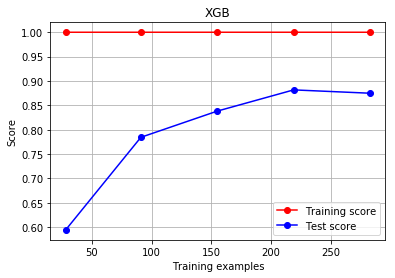

In [88]:
plot_learning_curve(XGBR(n_estimators=100,random_state=420),'XGB',Xtrain,Ytrain,ax=None,cv=cv)

110 0.8761011751875329


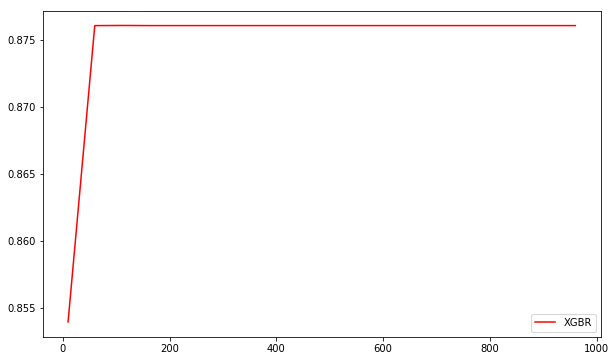

In [89]:
axis = range(10,1010,50)
rs=[]
for i in axis:
    reg = XGBR(n_estimators=i,random_state=420)
    rs.append(CVS(reg,Xtrain,Ytrain,cv=cv).mean())
print(axis[rs.index(max(rs))],max(rs))
plt.figure(figsize=(10,6))
plt.plot(axis,rs,c='red',label='XGBR')
plt.legend()
plt.show()

In [90]:
from sklearn.model_selection import learning_curve
learning_curve(XGBR(n_estimators=100,random_state=420),Xtrain,Ytrain,shuffle=True,cv=cv)

(array([ 28,  91, 155, 219, 283]),
 array([[1.        , 1.        , 1.        , 1.        , 0.99999999],
        [0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999],
        [0.99999999, 0.99999998, 0.99999999, 0.99999999, 0.99999999],
        [0.99999998, 0.99999993, 0.99999999, 0.99999999, 0.99999997],
        [0.99999908, 0.99999966, 0.99999965, 0.99999956, 0.99999984]]),
 array([[0.79203894, 0.73349109, 0.50084166, 0.44863463, 0.7163264 ],
        [0.83221817, 0.71457417, 0.677849  , 0.7349407 , 0.87761252],
        [0.84362622, 0.7036497 , 0.78907589, 0.80308329, 0.88010275],
        [0.80930631, 0.84590166, 0.80158888, 0.8449158 , 0.9178352 ],
        [0.92542079, 0.89079781, 0.85234647, 0.80755357, 0.92091097]]))

In [91]:
reg = XGBR(n_estimators=70,random_state=420)
CVS(reg,Xtrain,Ytrain,cv=cv).mean()

0.8760827670654837

### 泛化误差
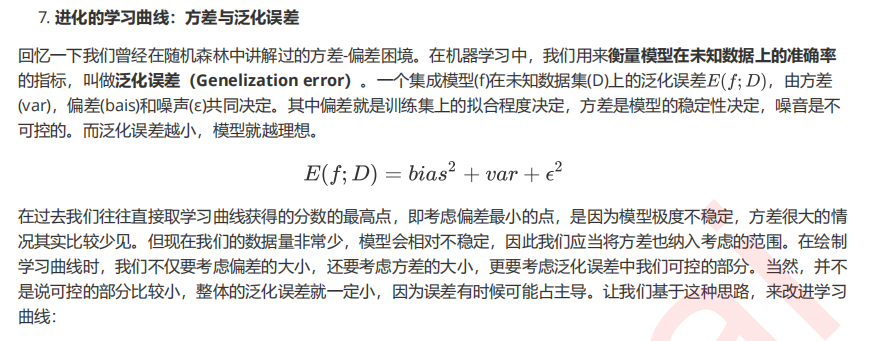

[0.8986684  0.85500301 0.82323735 0.81245068 0.88027883]
[0.91907154 0.88596335 0.84895481 0.80967459 0.89956733]
[0.92244884 0.89162043 0.85044718 0.80796016 0.9038467 ]
[0.92478554 0.89085859 0.85058308 0.808216   0.90420961]
[0.92522265 0.89095638 0.85193554 0.80790569 0.9043023 ]
[0.92535008 0.89075867 0.85221265 0.80770929 0.90441989]
[0.92536728 0.89076277 0.85216925 0.80773408 0.90438047]
[0.92538164 0.89077539 0.85214413 0.80763643 0.90443984]
[0.92544448 0.89079429 0.85227611 0.8075448  0.90442894]
90 0.8760977240233994 0.0017441442226873171
10 0.8539276545237036 0.0010719018121762936
60 0.8760901139282389 0.0017380714699324034 0.017091731336249225


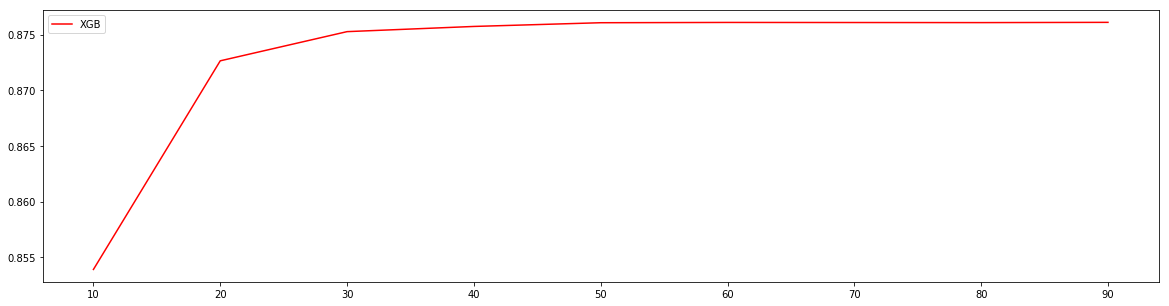

In [92]:
#======【TIME WARNING: 20s】=======#
axisx = range(10,100,10)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    print(cvresult)
    #记录1-偏差
    rs.append(cvresult.mean())
    #记录方差
    var.append(cvresult.var())
    #计算泛化误差的可控部分
    ge.append((1 - cvresult.mean())**2+cvresult.var())
#打印R2最高所对应的参数取值，并打印这个参数下的方差
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
#打印方差最低时对应的参数取值，并打印这个参数下的R2
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
#打印泛化误差可控部分的参数取值，并打印这个参数下的R2，方差以及泛化误差的可控部分
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

100 0.8761089054270551 0.0017427530560867911
50 0.8760645104130319 0.0017326991143212212
60 0.8760901139282389 0.0017380714699324034 0.017091731336249225


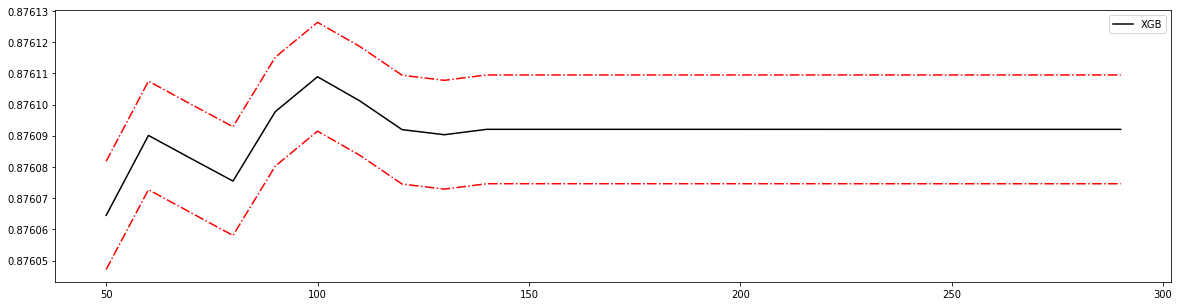

In [101]:
axisx = range(50,300,10)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)*0.01
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB") #添加方差线
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

In [98]:
from time import time
time0 = time()
print(XGBR(n_estimators=10,random_state=420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)

0.7561209022427964
0.021940231323242188


In [99]:
time0 = time()
print(XGBR(n_estimators=60,random_state=420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)

0.7876334458155381
0.09474420547485352


In [100]:
time0 = time()
print(XGBR(n_estimators=120,random_state=420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)

0.7875925464617382
0.17329049110412598
